In [7]:
import numpy as np
from scipy.integrate import odeint
import sympy as sp
import matplotlib.pyplot as plt
from math import e, inf
from IPython.display import display

Question 1

In [8]:
# Initial Conditions
a, b, r ,y0, p = 80, 0.4, 35, 5, 0.90

def quiz3_1(y0, a, b, r, p):
    #symbols
    t = sp.symbols('t', real = True)
    Q = sp.Function('Q')(t)

    #dsolve
    eqa = sp.Eq(Q.diff(t), r*b - r * Q/a)
    s_sol = sp.dsolve(eqa,Q,ics = {Q.subs(t,0):y0})

    #limit
    y_limit_to_infty = s_sol.rhs.limit(t, inf)

    #tim

    s_set = sp.Eq(y_limit_to_infty*(p), s_sol.rhs)
    print("Equation with s set as constant")
    display(s_set)
    tim = sp.solve(s_set,t,rational=False)

    return s_sol, y_limit_to_infty, tim

In [9]:
s_sol,y_limit,time = quiz3_1(y0,a,b,r,p)
print("Y Solution")
display(s_sol)
print("Limit")
display(y_limit)
print("Time : {}".format(time))

Equation with s set as constant


Eq(28.8, 32.0 - 27.0*exp(-7*t/16))

Y Solution


Eq(Q(t), 32.0 - 27.0*exp(-7*t/16))

Limit


32.0000000000000

Time : [4.87471098559691]


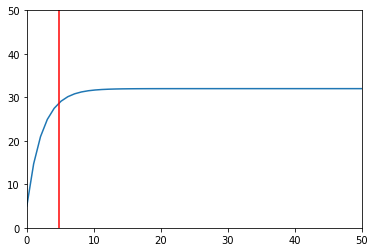

In [10]:
t = sp.symbols('t')
x = np.linspace(0,50)
f = sp.lambdify(t,s_sol.rhs)
plt.xlim(0,50)
plt.ylim(0,50)
plt.plot(x,f(x))
plt.axvline(x = time, color = "red")

Question 2

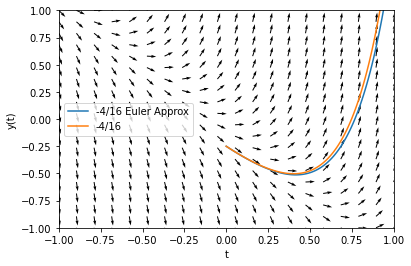

In [11]:
#euler method
def dydt(y ,t):
    return 4 * y + 5 * t

def eulersMethod(t,y0,h,dydt):
    y = []
    y.append(y0)
    for i in range(0,t.size - 1):
        y.append(y[i] + dydt(y[i], i*h) * h)
    return np.array(y)

t = np.arange(0,1,0.01)
y0 = -4/16
h = 0.01
y = eulersMethod(t, y0, h, dydt)

#plot line
plt.xlabel("t")
plt.ylabel("y(t)")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(t,y, label = "-4/16 Euler Approx")

#odeint
y = odeint(dydt, y0, t)
plt.plot(t, y, label = "-4/16")
plt.legend()
#plot quiver
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)
xx, yy = np.meshgrid(x, y)
zz = 4 * yy + 5 * xx
zx = np.cos(np.arctan(zz))
zy = np.sin(np.arctan(zz))
plt.quiver(x,y,zx,zy)

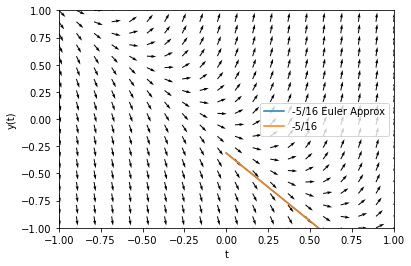

In [12]:
#euler method
def dydt(y ,t):
    return 4 * y + 5 * t

def eulersMethod(t,y0,h,dydt):
    y = []
    y.append(y0)
    for i in range(0,t.size - 1):
        y.append(y[i] + dydt(y[i], i*h) * h)
    return np.array(y)

t = np.arange(0,1,0.01)
y0 = -5/16
h = 0.01
y = eulersMethod(t, y0, h, dydt)

#plot line
plt.xlabel("t")
plt.ylabel("y(t)")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(t,y, label = "-5/16 Euler Approx")

#odeint
y = odeint(dydt, y0, t)
plt.plot(t, y, label = "-5/16")
plt.legend()
#plot quiver
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)
xx, yy = np.meshgrid(x, y)
zz = 4 * yy + 5 * xx
zx = np.cos(np.arctan(zz))
zy = np.sin(np.arctan(zz))
plt.quiver(x,y,zx,zy)